In [66]:
import pandas as pd
import tensorflow as tf
import json
import re
import numpy as np
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import linear_model
from datetime import datetime
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Activation, Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import Bidirectional, Conv1D, GlobalAveragePooling1D, MaxPooling1D
import h5py

userdatapath = '/home/titli/Documents/Springboard1/Machinelearning/test.csv'
selecteddatapath = '/home/titli/Documents/Springboard1/Machinelearning/test1.csv'
reviewfile= '/home/titli/Documents/Springboard1/Machinelearning/review.json'
businessfile = '/home/titli/Documents/Springboard1/Machinelearning/business.json'
numsamples=1000
rowsamples=200
pd.options.display.max_columns = 1000
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [67]:
old=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)

#100 points

selectedrows=[0,8,12,15,19,25,28,29,45,47,53,54,65,71,85,87,94,101,106,114,126,127,174,175, \
              176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258, \
              275,276,279,284,289,290,303,309,313,326,331,332,338,349,356,364,366,381,387,390,392,397,\
              404,408,418,444,445,455,470,474,480,482,489,495,497,500,507,517,520,529, \
              1,2,3,4,5,6,7,9,10,13,17,18,21,24,26,27,30,31,32,33,34,35, \
              183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269,\
              327,328,329,333,334,335, 336,337,339,340,341,342,343,345,346,347,350,351,352,353,359,360,362,\
              363,365,367,368,369,627,374,376,380,382,383,385,386,388, \
              128,136,142,149,153,155,167,268,274,555,569,582,583,591,597,601,611,614,622,631, \
              36,37,38,39,40,42,43,44,270,273,389,391,393,394,395,396,400,471,473,479,623,624,626]                         
              
              
#fake=174,175,176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258,268,274,275,276,279,284,289,290,303, \
#309,313,326
#183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269,270,273,278,281,282,283,285,286,287,291,292,293,\
#295,296,324,325
inter=[]
for row in selectedrows:
    line= old.iloc[row]
    inter.append(line)
old_1=pd.DataFrame(inter)
old_1.set_index('user_id')
old_1.head(10)
old_1.to_csv(selecteddatapath)
small= pd.read_csv(selecteddatapath, header=0)
cols = 'average_stars 	review_count compliment_cool 	compliment_cute 	compliment_funny 	 \
compliment_hot 	compliment_list 	compliment_more 	compliment_note 	compliment_photos 	 \
compliment_plain 	cool  	fans funny '.split()
old_2=small[cols]
old_2.head()

,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny
0,4.67,8,0,0,0,0,0,0,0,0,1,0,0,0
1,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.67,2,0,0,0,0,0,0,0,0,0,0,0,0
3,3.00,2,0,0,0,0,0,0,0,0,0,1,0,0
4,3.73,48,1,0,1,2,0,0,1,0,1,2,3,6


In [68]:
from pandas.io.json import json_normalize
def getreviews(user_ids):
    """ gets one text review for each user in user_ids list"""
    result=[]
    with open(reviewfile) as f:
         for line in f:
             record = json.loads(line)
             if record['user_id'] in user_ids: 
                result.append(record)
             if len(result) >= 1000:  #numsamples
                break
    reviewdata = pd.DataFrame(result)
    return reviewdata

In [69]:
user_ids=[]
for counter, value in enumerate(selectedrows):
    user_ids.append(old['user_id'].iloc[value])

In [70]:
review_texts_all = getreviews(user_ids)
review_texts_all.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,K1tLIHP5DLZG5NYIt83iYA,0,2017-10-02,0,7AIRjMM5y80d8WlcyY32uQ,5,"Ken and Debra are amazing real estate agents! I know that there are so many real estate agents here in AZ, but I can't recommend Ken and Debra enough. I had been taken advantage of by an agent a number of years ago, and I was hesitant to go through the process again. Actually terrified was more like it. This time couldn't be more different. Ken and Debra were there for us every step of the way. The most important thing was that they listened to us throughout the process. No question was too insignificant. They were incredibly helpful making sure that all of our concerns were addressed, and if there were questions that we didn't know to ask, they made sure we got answers to those questions as well. I really felt like they had our best interests in mind, and I never felt we were left in the dark. I really felt like we were working with friends!",0,RJaOM110aQlyfab_mYBw4w
1,PmgbmK6wG0S-Nndo1becBA,0,2016-04-23,0,z8OYnWR_s62vtHp5GCmEWQ,1,Absolute worst service. I have never been treated so rudely. Food was cold. Managers girlfriend was even rude. Floor was sticky and food sub par.,1,akFg3cvYqbihkdYUIjTauQ
2,rL-hprXkcvfYSL9kWBFglQ,0,2014-02-23,0,JCUtZ8QvWDdjSEm7Km9W-w,5,"I will be back. Unlike the old Native New Yorker, Austins is clean, relaxing, and no longer reeks of stale beer and vomit. The cuban pizza is uniquely tastey. Overall great time.",0,ddhNJ-nbjwjHoSth6qXJ8g
3,p_22wrx3GmAzlbrGA6LyYg,0,2014-03-10,0,-nj0swfsRUk83zgpWibT0A,5,Proud to support family owned restaurant. I love riding my bike to the garden pizza and chilling out. I do want a bar added to the restaurant. Overall tasty.,0,ddhNJ-nbjwjHoSth6qXJ8g
4,_ZfjpSEO5ntk-1hbnwCR4g,0,2015-10-10,1,fVL9vfsWydvzxVfmEiERtg,2,"Stayed here for a few nights on a random getaway my boyfriend planned. The hotel itself was very nice with a more modern look to it, Should mention that we stayed on the 53rd floor. Would have given it 5 stars if it wasn't for HOUSEKEEPING GOING THROUGH MY PURSE. I don't like to bash on businesses but I'm someone who reads reviews to help make a decision on things and I would want to know what to beware of. I had left my purse zipped close on one of the bottom shelves of the desk right before we went out to come back after housekeeping was in to find it fully unzipped spread open. As you can imagine I was furious with this and called the hotel to notify them. Security came up and took a report and I received a call a day after we checked out from hotel management. They took $115 off what we payed but at the end of the day I don't think I will ever visit that hotel again. What's $115 to knowing someone has gone through your personal belongings while you were out. Very unfortunate that one person can make such a negative impact. I really hope they follow up with that issue so that it doesn't happen to anyone else. \nThe only other thing that was wrong there was that every time after the shower was used the whole restroom would smell bad. Pretty sure it had something to do with their drains but it almost smelt like sewage or vomit. Without those two issues I really would have given it 5 stars.",0,gb8PYSCKlvPbMWnqIWXmlQ


In [71]:
uniquerows =[]
review_first_line = []
for i , v in enumerate(user_ids):
    user_array = review_texts_all[review_texts_all.user_id == v].index
    review_first_line.append(review_texts_all.iloc[user_array[0]])
review_first_text = pd.DataFrame(review_first_line)
review_first_text.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
274,Rie3AW2484Gnb7aMU5rTbQ,0,2016-07-25,0,M6vRG_faDZIyswkUZQBTVA,5,"As a new resident in Mesa, I couldn't believe that there weren't more carwashes around in my immediate area off of McKellips and Recker. I then did a search on Google to find a good car wash and found Francis and Son's Car Wash on Main Street off Higley. \n\nThey take their time and do it right. It's been cleaned perfectly...friendly and happy employees, which makes me happy. Since it's a new car for me, I was very picky about how it was done and was very pleased and continue to frequent their car wash. Thank you!!",3,oMy_rEb0UBEmMlu-zcxnoQ
18,XuByFsXXhnKmZ6hxucOj7A,0,2011-10-12,0,FIEB1bxvWlzax8KQ5_Qdgw,1,"Our dining experience was generally poor. There were few people in the restaurant, and yet it took a very long time to take our drink orders, get our food, and bring our check. Service was relatively slow given the buffet-style setting.\n\nI was part of a group of four, and we all selected fried rice for our rice option, however, when our dishes were served we all found chunks of white rice in our bowls. The roti bread felt stiff and dry, and several of our bowls had bits of ingredients that weren't personally added. Overall, these issues make the dining experience unpleasant in general.\n\nHowever, in addition, the food is over-priced at $16/bowl (plus $2 if you want to take your leftovers home). I never thought I'd say this, but if you're in the mood for make-your-own stir-fry? Go to Flat Top, in Campustown.",2,Ykj0DVsz0c6rX9ghjd0hDg
39,RWnDNJ5OrUTPfv0yVuq_fg,0,2016-06-28,0,Y8POEfWWf4crUqkn0rpwwA,3,I think it was overpriced for what it is. Food was good but expensive. I had chicken with olives and my sister had linguine and clams. We had appetizers and a bottle of wine and split a dessert. Total was $130.00. I think you can do better.,1,Mmv5fPxbF8XEMN4EPT_Khg
364,AY19WQ4S096AVPV6YeB9sQ,0,2018-05-23,0,Xk2fk-CWGXgBN0abj7ltjQ,4,Ita ok I don't like the manager on the weekday nights though she has a bad attitude and she told her employees to not call her name then insulted ones mom right infront of me,0,V--GjQPlTpeWbcB2cS06Gw
461,x0dMACZ3NlDWTDyFAW0jHw,0,2017-06-08,0,8C_-9KjHGJpvnY3DqS6MrQ,3,"Roadhouse Cinemas is a slightly better Studio Movie Grill. With a western theme that is slightly tacky and almost looks like it wasn't given a full effort. I came to this place for the first time due to a Groupon. 2 tickets, popcorn, and 2 beers for $21. The price is unbeatable and I will agree that it is an amazing deal. \n\nThe reason this place gets three stars is because it is still a great place to come and so far has been the best Dine-In Movie theater in Arizona I have visited, but the service here is truly lacking. Our drinks took much longer than an acceptable time to arrive. I had to press my call button to check on my drinks before they finally brought them. Server didn't really check on us unless we pressed the call button. I would've ordered more had they checked in. \n\nThe Roadtrip for two is supposed to come with two ""fully loaded quesadillas"" but what we truly got was about a half of a quesadilla to share. I understand it's happy hour, but at least be more transparent so that people know what to expect when they order. \n\nThe White Cheddar popcorn was a huge bowl of popcorn, I was pleased with it. \n\nThe restroom was decent, one out of order urinal but the urine cakes smelled like they hadn't been replaced in some time. \n\nOverall, I will be coming back and will be recommending this place, but I hope management sees the large room for improvement here in the service of the wait staff. This place has a big potential to be five stars if their staff is held to a higher standard.",0,jYnkJR3T8yCERXywoVhWYA


In [72]:
review_first_text['text']= [x.lower() for x in review_first_text['text']]
review_first_text['text'] = review_first_text['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
for idx,row in review_first_text.iterrows():
    row[0] = row[0].replace('rt',' ')

In [73]:
pd.set_option('display.max_colwidth',-1)
review_first_text[:5]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
274,Rie3AW2484Gnb7aMU5rTbQ,0,2016-07-25,0,M6vRG_faDZIyswkUZQBTVA,5,as a new resident in mesa i couldnt believe that there werent more carwashes around in my immediate area off of mckellips and recker i then did a search on google to find a good car wash and found francis and sons car wash on main street off higley \n\nthey take their time and do it right its been cleaned perfectlyfriendly and happy employees which makes me happy since its a new car for me i was very picky about how it was done and was very pleased and continue to frequent their car wash thank you,3,oMy_rEb0UBEmMlu-zcxnoQ
18,XuByFsXXhnKmZ6hxucOj7A,0,2011-10-12,0,FIEB1bxvWlzax8KQ5_Qdgw,1,our dining experience was generally poor there were few people in the restaurant and yet it took a very long time to take our drink orders get our food and bring our check service was relatively slow given the buffetstyle setting\n\ni was part of a group of four and we all selected fried rice for our rice option however when our dishes were served we all found chunks of white rice in our bowls the roti bread felt stiff and dry and several of our bowls had bits of ingredients that werent personally added overall these issues make the dining experience unpleasant in general\n\nhowever in addition the food is overpriced at 16bowl plus 2 if you want to take your leftovers home i never thought id say this but if youre in the mood for makeyourown stirfry go to flat top in campustown,2,Ykj0DVsz0c6rX9ghjd0hDg
39,RWnDNJ5OrUTPfv0yVuq_fg,0,2016-06-28,0,Y8POEfWWf4crUqkn0rpwwA,3,i think it was overpriced for what it is food was good but expensive i had chicken with olives and my sister had linguine and clams we had appetizers and a bottle of wine and split a dessert total was 13000 i think you can do better,1,Mmv5fPxbF8XEMN4EPT_Khg
364,AY19WQ4S096AVPV6YeB9sQ,0,2018-05-23,0,Xk2fk-CWGXgBN0abj7ltjQ,4,ita ok i dont like the manager on the weekday nights though she has a bad attitude and she told her employees to not call her name then insulted ones mom right infront of me,0,V--GjQPlTpeWbcB2cS06Gw
461,x0dMACZ3NlDWTDyFAW0jHw,0,2017-06-08,0,8C_-9KjHGJpvnY3DqS6MrQ,3,roadhouse cinemas is a slightly better studio movie grill with a western theme that is slightly tacky and almost looks like it wasnt given a full effort i came to this place for the first time due to a groupon 2 tickets popcorn and 2 beers for 21 the price is unbeatable and i will agree that it is an amazing deal \n\nthe reason this place gets three stars is because it is still a great place to come and so far has been the best dinein movie theater in arizona i have visited but the service here is truly lacking our drinks took much longer than an acceptable time to arrive i had to press my call button to check on my drinks before they finally brought them server didnt really check on us unless we pressed the call button i wouldve ordered more had they checked in \n\nthe roadtrip for two is supposed to come with two fully loaded quesadillas but what we truly got was about a half of a quesadilla to share i understand its happy hour but at least be more transparent so that people know what to expect when they order \n\nthe white cheddar popcorn was a huge bowl of popcorn i was pleased with it \n\nthe restroom was decent one out of order urinal but the urine cakes smelled like they hadnt been replaced in some time \n\noverall i will be coming back and will be recommending this place but i hope management sees the large room for improvement here in the service of the wait staff this place has a big potential to be five stars if their staff is held to a higher standard,0,jYnkJR3T8yCERXywoVhWYA


In [74]:
review_first_text.dtypes

business_id    object
cool           int64 
date           object
funny          int64 
review_id      object
stars          int64 
text           object
useful         int64 
user_id        object
dtype: object

In [75]:
def iter_spacy(strs, tokenizer):
    words = []
    for s in strs:
        #doc = nlp(s)
        doc = tokenizer(s)
        tokens = [str(token) for token in doc]
        counts = collections.Counter(tokens)
        yield counts

In [76]:
bows_spacy = pd.DataFrame(iter_spacy(review_first_text.text, tokenizer )).fillna(0).astype(int)

In [77]:
bows_spacy.head()

,,,,,,,,,,03,06232017,1,10,100,1030,1030am,1045,10k,11,11013,115,12,13,13000,14,15,16,16bowl,2,20,2009,2013,2025mins,21,21st,23,230,24,25,250,2929,2am,3,30,300,35,35th,3d,4,40,400,45,450,458,48,5,50,53rd,55,5pm,6,615pm,7,70,70s,75,78,795,8,810,85,9,90s,938,95,a,ability,able,about,above,absolute,absolutely,ac,accent,accept,acceptable,accepting,accommodating,accomodating,account,accused,acknowledgement,across,act,actively,activity,actual,actually,adam,add,addas,added,adding,addition,additional,additions,address,addressed,admission,adorable,adore,adult,advance,advantage,adventure,adventuredome,advertised,advice,advise,advised,afraid,after,afternoon,afterwards,again,against,agent,agents,ago,agree,ahead,aint,air,airport,aka,alabama,alarming,alcohol,alerting,alex,alfredo,alice,all,allow,allowed,almonds,almost,alone,along,alot,already,alright,alrightdefinitely,also,although,always,am,amanda,amazed,amazing,amazingly,ambiance,ambience,amenities,among,amount,an,anahit,and,angry,anniversary,annoying,annoyingfriesnot,another,answer,answered,answers,anticipating,antioxidant,any,anymore,anyone,anything,anytime,anyway,anyways,anywhere,apart,apartment,apartments,apologize,apology,app,apparently,appealing,appeared,appears,appetizer,appetizers,appointment,appointments,appreciate,approach,approved,aqua,arcade,are,area,argue,argued,arizona,aroma,aromatherapy,around,arrive,arrived,arriving,arrogant,art,artichoke,artists,arts,arugula,as,asada,ask,asked,asking,askingnowadays,asks,assembled,assistant,assisting,assorted,assume,assuming,assure,asu,at,ate,atlanta,atmosphere,attached,attack,attempted,attendant,attended,attention,attentive,attitude,attorney,austins,authentic,authority,autozone,availability,available,average,avoid,away,awesome,awful,ayce,az,babysitting,bacchanal,back,backbut,backup,bacon,bad,bag,bags,baked,bakery,bakes,balance,ball,balsamic,baltimore,banana,band,bangs,banh,bank,bar,barbecue,barbers,barecoa,barely,barista,bars,bartalotta,bartender,bartenders,base,bash,bass,bat,batch,bathroom,bazillion,bbq,bc,be,beans,beautiful,beauty,beaverfalls,became,because,become,bed,bedroom,beds,beef,been,beer,beers,beet,before,begin,beginning,behind,being,believe,bellagio,belongings,below,best,bet,better,between,beucase,beware,beyond,bf,bicycle,big,bigger,bikes,bill,biltmore,biriyani,birthday,biryani,biscuits,bit,bite,bits,bjj,bland,bless,blessed,blimpie,block,blocks,blonde,blown,blue,board,body,boneless,book,booked,booking,booth,booze,bore,both,bother,bothers,bottle,bottled,bottles,bottom,bouffant,bought,bouncer,bouquet,boutique,bowl,bowls,box,boxed,boy,boyfriend,boys,brandon,bread,breading,break,breakfast,breeze,brent,brewed,brewery,brews,bridal,bridges,brilliant,bring,bringing,brisket,bro,broccoli,broke,broth,brothers,brought,brown,browned,buche,bucks,buddy,budofficiant,buffalo,buffet,buffetstyle,bugs,building,bulls,bullshit,bummer,bunch,burger,burgers,buried,burnt,burried,bus,buses,business,businesses,busy,but,butcher,butter,butternut,button,buy,buying,by,bygone,cab,cabbage,cachitos,cadillac,caesar,caesars,cake,cakes,california,call,called,calling,calls,calzones,came,cameo,campero,campustown,can,canadian,candy,cannot,cans,cant,capable,cappuccinos,captured,car,caramel,cardboard,care,careless,cares,carne,carnitas,carolina,carolinas,carpet,carpets,carrots,carry,cars,carte,carved,carwashes,cascade,case,cash,cashier,casino,casual,cat,cater,caters,cause,cedar,...,styled,styles,styling,stylish,stylist,stylists,sub,subpar,substitute,such,sucker,sucks,suction,sugary,suggest,suggested,suggesting,suggests,suitable,suite,suits,sum,sumatra,sun,sunday,super,superb,superior,superstar,supplies,support,supportive,supposed,supposedly,sure,surgeon,surprise,surprised,surprisingly,survey,sw,swear,sweat,sweating,sweet,sweetest,sweets,switch,switching,syrup,system,szechuan,table,tables,tackle,tacky,taco,tacos,tactics,tag,tahini,tail,take,taken,takeout,taking,talented,talk,tangerine,tangy,tank,tanning,tapes,taquitos,target,taste,tasted,tastefully,tasteless,tastes,tastey,

In [78]:
d={'Faker':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
faker= pd.DataFrame(data=d)
len(faker)
dataset1=bows_spacy[faker['Faker']==1]
dataset0=bows_spacy[faker['Faker']==0]


### Test-train split

In [79]:
Y = pd.get_dummies(faker.Faker).values
X_train = bows_spacy[:160]
X_test =  bows_spacy[160:]
Y_train = Y[:160]
Y_test = Y[160:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(160, 3253) (160, 2)
(40, 3253) (40, 2)


### CREATE LSTM MODEL

In [80]:
embed_dim = 128
lstm_out = 196
batch_size = 16

model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = bows_spacy.shape[1], dropout = 0.2))
model.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['binary_accuracy'])
print(model.summary())

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(196, dropout=0.2, recurrent_dropout=0.2)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 3253, 128)         256000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('boat_detector')
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) 
callbacks_list = [checkpoint, early, reduceLROnPlat]

/home/titli/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [82]:
model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = 10, validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 160 samples, validate on 40 samples
Epoch 1/10
160/160 [==============================] - 53s 330ms/step - loss: 0.7039 - binary_accuracy: 0.4750 - val_loss: 0.6930 - val_binary_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69301, saving model to boat_detector_weights.best.hdf5
Epoch 2/10
160/160 [==============================] - 51s 321ms/step - loss: 0.6960 - binary_accuracy: 0.4875 - val_loss: 0.6952 - val_binary_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.69301
Epoch 3/10
160/160 [==============================] - 51s 321ms/step - loss: 0.6943 - binary_accuracy: 0.5000 - val_loss: 0.6935 - val_binary_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.69301
Epoch 4/10
160/160 [==============================] - 53s 330ms/step - loss: 0.6974 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.69301
Epoch 5/10
160/160 [==============================] - 51s 321m

In [83]:
model.load_weights(weight_path)
model.save('LSTM_model.h5')
for k, v in zip(model.metrics_names, 
        model.evaluate(X_test, Y_test)):
    if k!='loss':
        print('{:40s}:\t{:2.1f}%'.format(k, 100*v))

40/40 [==============================] - 3s 74ms/step
binary_accuracy                         :	50.0%


### CREATE BIDIRECTIONAL LSTM

In [84]:
embed_dim = 128
lstm_out = 196
batch_size = 16

model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = bows_spacy.shape[1], dropout = 0.2))
model.add(Bidirectional(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2)))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['binary_accuracy'])
print(model.summary())

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(196, dropout=0.2, recurrent_dropout=0.2)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 3253, 128)         256000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 392)               509600    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 786       
Total params: 766,386
Trainable params: 766,386
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
weight_path="{}Bi-LSTM_weights.best.hdf5".format('boat_detector')
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) 
callbacks_list = [checkpoint, early, reduceLROnPlat]

/home/titli/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [86]:
model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = 10, validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 160 samples, validate on 40 samples
Epoch 1/10
160/160 [==============================] - 110s 685ms/step - loss: 0.7031 - binary_accuracy: 0.4375 - val_loss: 0.6938 - val_binary_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69377, saving model to boat_detectorBi-LSTM_weights.best.hdf5
Epoch 2/10
160/160 [==============================] - 96s 599ms/step - loss: 0.6936 - binary_accuracy: 0.4875 - val_loss: 0.6931 - val_binary_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.69377 to 0.69313, saving model to boat_detectorBi-LSTM_weights.best.hdf5
Epoch 3/10
160/160 [==============================] - 96s 597ms/step - loss: 0.6937 - binary_accuracy: 0.4813 - val_loss: 0.6929 - val_binary_accuracy: 0.5000

Epoch 00003: val_loss improved from 0.69313 to 0.69286, saving model to boat_detectorBi-LSTM_weights.best.hdf5
Epoch 4/10
160/160 [==============================] - 96s 602ms/step - loss: 0.6941 - binary_accuracy: 0.5250 - val_loss: 0.6927 - val_binary_acc

In [87]:
model.load_weights(weight_path)
model.save('Bi-LSTM_model.h5')
for k, v in zip(model.metrics_names, 
        model.evaluate(X_test, Y_test)):
    if k!='loss':
        print('{:40s}:\t{:2.1f}%'.format(k, 100*v))

40/40 [==============================] - 4s 112ms/step
binary_accuracy                         :	52.5%


### CNN 
* First 1D CNN layer: The first layer defines a filter (or also called feature detector) of height 10 (also called kernel size). Only defining one filter would allow the neural network to learn one single feature in the first layer. This might not be sufficient, therefore we will define 100 filters. This allows us to train 100 different features on the first layer of the network. The output of the first neural network layer is a 71 x 100 neuron matrix. Each column of the output matrix holds the weights of one single filter. With the defined kernel size and considering the length of the input matrix, each filter will contain 71 weights.
* Second 1D CNN layer: The result from the first CNN will be fed into the second CNN layer. We will again define 100 different filters to be trained on this level. Following the same logic as the first layer, the output matrix will be of size 62 x 100.
* Max pooling layer: A pooling layer is often used after a CNN layer in order to reduce the complexity of the output and prevent overfitting of the data. In our example we chose a size of three. This means that the size of the output matrix of this layer is only a third of the input matrix.
* Third and fourth 1D CNN layer: Another sequence of 1D CNN layers follows in order to learn higher level features. The output matrix after those two layers is a 2 x 160 matrix.
* Average pooling layer: One more pooling layer to further avoid overfitting. This time not the maximum value is taken but instead the average value of two weights within the neural network. The output matrix has a size of 1 x 160 neurons. Per feature detector there is only one weight remaining in the neural network on this layer.
* Dropout layer: The dropout layer will randomly assign 0 weights to the neurons in the network. Since we chose a rate of 0.5, 50% of the neurons will receive a zero weight. With this operation, the network becomes less sensitive to react to smaller variations in the data. Therefore it should further increase our accuracy on unseen data. The output of this layer is still a 1 x 160 matrix of neurons.
* Fully connected layer with Softmax activation: The final layer will reduce the vector of height 160 to a vector of six since we have six classes that we want to predict (“Jogging”, “Sitting”, “Walking”, “Standing”, “Upstairs”, “Downstairs”). This reduction is done by another matrix multiplication. Softmax is used as the activation function. It forces all six outputs of the neural network to sum up to one. The output value will therefore represent the probability for each of the six classes.

Note: https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf


In [88]:
model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = bows_spacy.shape[1], dropout = 0.2))
model.add(Conv1D(256, 20, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(256, 20, activation='relu'))
model.add(Conv1D(256, 20, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(2, activation='softmax'))
#model.add(Dropout(0.5))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['binary_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 3253, 128)         256000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3234, 256)         655616    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1078, 256)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1059, 256)         1310976   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1040, 256)         1310976   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total para

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  


In [89]:
weight_path="{}CNN-LSTM_weights.best.hdf5".format('boat_detector')
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) 
callbacks_list = [checkpoint, early, reduceLROnPlat]

/home/titli/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [91]:
history= model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = 10, validation_data=(X_test, Y_test),
          callbacks=callbacks_list)

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 160 samples, validate on 40 samples
Epoch 1/10
160/160 [==============================] - 107s 671ms/step - loss: 0.7335 - binary_accuracy: 0.4875 - val_loss: 0.6932 - val_binary_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69319, saving model to boat_detectorCNN-LSTM_weights.best.hdf5
Epoch 2/10
160/160 [==============================] - 96s 601ms/step - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.69319 to 0.69315, saving model to boat_detectorCNN-LSTM_weights.best.hdf5
Epoch 3/10
160/160 [==============================] - 85s 529ms/step - loss: 0.6934 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000

Epoch 00003: val_loss improved from 0.69315 to 0.69315, saving model to boat_detectorCNN-LSTM_weights.best.hdf5
Epoch 4/10
160/160 [==============================] - 83s 522ms/step - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_

In [93]:
#model.load_weights(weight_path)
#model.save('CNN_model.h5')
#for k, v in zip(model.metrics_names, 
#        model.evaluate(X_test, Y_test)):
#    if k!='loss':
#        print('{:40s}:\t{:2.1f}%'.format(k, 100*v))

In [94]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

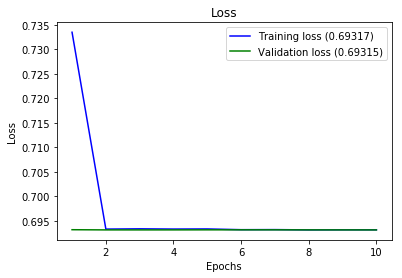

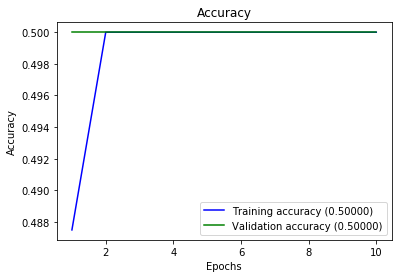

In [95]:
plot_history(history)